# Introduction to NumPy


NumPy (Numerical Python) is an open source Python library that is widely used in science and engineering.  It is optimized and easy-to-use and offers e.g. linear algebra routines and a comprehensive set of mathematical functions.

Reference: online [documentation](https://numpy.org/doc/stable/)

In [2]:
# Imports for this lecture
import time
import numpy as np # notice the alias "np" for the numpy library
import matplotlib.pyplot as plt # library for plotting data

## Arrays

An array is a 'grid' of values of the same type. For instance, a one-dimensional array can be thought of as list, while a two-dimensional array is a table (or 2D matrix). Each array has the following attributes:
- `shape`, a tuple representing the shape of the data. For example, a $3 \times 4$ matrix has shape $(3,4)$;
- `data`, raw data storage in memory;
- `dtype`, data type (for instance, int32 or float32).

### Creating arrays

NumPy arrays can be created from lists with a special structure:

In [3]:
# 1-dimensional array of length 3
a = np.array([1,2,3])
# 2-dimensional array of shape (2,3) -> 3x4 matrix
b = np.array([[1,2,3], [4,5,6]]) # notice the correspondence between lists and rows/columns of the matrix
print(f"a={a}")
print(f"b={b}")

a=[1 2 3]
b=[[1 2 3]
 [4 5 6]]


The data type is inferred from the values contained in the lists (in this case, integers):

In [4]:
print(b.dtype)

int64


In [5]:
# list of floats -> dtype=float64
a = np.array([1.,2.,3.])
print(a.dtype)

float64


In [6]:
# 3x4 matrix of zeros
zero = np.zeros((3,4))
zero

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
# Default type for np.zeros is float
print(zero.dtype)

float64


In [8]:
# Data type can be manually enforced
zero = np.zeros((3,4), dtype = np.int64)
print(zero.dtype)

int64


In [9]:
# 2x5 matrix of ones
one = np.ones((2,5))
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
# identity matrix
identity = np.eye(5)
identity

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Arrays vs lists

Array manipulations are faster than list operations, especially when they contain many values, because NumPy uses highly-optimized numerical routines. In the following example we compare the performance of NumPy array operations vs that of list operations.

In [11]:
length = 100000000
a = list(range(length))
b = [ 0 ] * length # a list of zeros containing with len=length

In [12]:
# Square of a list
tic = time.time() # record starting time
for i in range(len(a)):
  b[i] = a[i]**2
toc = time.time() # record ending time
print(f"Elapsed time: {toc - tic}")

Elapsed time: 7.572597026824951


In [13]:
a_np = np.arange(length) # equivalent to np.array(range(length))
b_np = np.zeros(length) # pre-allocate an array of zeros to keep the result of the square

In [14]:
tic = time.time()
b_np = a_np ** 2
toc = time.time()
print(f"Elapsed time: {toc - tic}")

Elapsed time: 0.16474294662475586


Notice that the code operating on lists involves a `for` loop, which is _slow_ in
Python, due to the interpreted nature of the language. NumPy is faster because its
operations are **vectorized**, i.e. they do not involve explicit loops, indexing, etc.,
in the code. These things are taking place, under the hood in optimized, pre-compiled C
code. Hence, to exploit the efficiency of NumPy, try to avoid `for` loops and use
vectorized operations!

### Basic operations on arrays

In [15]:
# Getting the attributes of an array
print(f"Shape: {one.shape}")
print(f"Size: {one.size}") # size = total number of elements
print(f"Number of dimensions: {one.ndim}")
print(f"Data type: {one.dtype}")

Shape: (2, 5)
Size: 10
Number of dimensions: 2
Data type: float64


In [16]:
# Element-wise addition
a = np.array([1,2,3])
b = np.array([4,5,6])
a + b

array([5, 7, 9])

In [17]:
# Element-wise subtraction
a - b

array([-3, -3, -3])

In [18]:
# Element-wise multiplication
a*b

array([ 4, 10, 18])

In [19]:
# Element-wise division
a/b

array([0.25, 0.4 , 0.5 ])

In [20]:
# Transpose
a = np.array([[1,2,3], [4,5,6]])
print(a)
# more general alternative: np.transpose
a.T

[[1 2 3]
 [4 5 6]]


array([[1, 4],
       [2, 5],
       [3, 6]])

NumPy contains _many_ functions: check the online [docs](https://numpy.org/doc/stable/reference/index.html) when you need a specific function.

## Linear Algebra with NumPy

NumPy can efficiently handle Linear Algebra computations.

In [43]:
# Matrix-vector product
M = np.ones((3,2))
a = np.ones(2)
M @ a 

array([2., 2., 2.])

Notice: the behavior of the @ operator depends on the shape of the operands involved.
Check the
[docs](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul)
when in doubt.

In [46]:
M @ M.T # result: 3x3 matrix

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [47]:
# Dot product between two one-dimensional arrays = scalar product of vectors
a = np.array([0,3,4])
b = np.array([4,5,6])
np.dot(a,b) # check the docs when the arrays are not one-dimensional

39

In [54]:
# Element-wise multiplication between arrays of the same shape;
# when shapes are different, broadcasting
# (https://numpy.org/doc/stable/user/basics.broadcasting.html) may be applied
A = np.array([[1,5],[2,9]])
B = np.array([[1,2],[3,4]])
A * B

array([[ 1, 10],
       [ 6, 36]])

In [49]:
# 2-norm (Euclidean) of a vector
np.linalg.norm(a)

5.0

In [48]:
# Solving a linear system Ax=b
A = np.array([[1,2],[0,1]]) # matrix of the coefficients
b = np.array([3,4]) # right hand side of the system
x = np.linalg.solve(A,b)
print(f"The solution of the system Ax = b is: {x}")

The solution of the system Ax = b is: [-5.  4.]


In [26]:
# Solution check
A @ x

array([3., 4.])

In [27]:
# Inverse of a matrix
A = np.array([[1,2], [0, 1]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1., -2.],
       [ 0.,  1.]])

In [28]:
# Inverse check
A @ A_inv

array([[1., 0.],
       [0., 1.]])

## Examples

### 1. Approximations of $\pi$

#### 1.1 Monte Carlo approximation of $\pi$

To estimate the value of $\pi$ we can proceed as follows. Consider a circle or radius $\frac{1}{2}$ inscribed in a square with edge $1$. The area of the circle is $\frac{\pi}{4}$ and can be estimated generating a large number of randomly placed points within the square and by counting how many of these fall in the enclosing circle. Precisely,
$$\frac{\pi}{4} \approx \frac{n_{\text{in}}}{n},$$
where $n$ is the number of points generated and $n_{\text{in}}$ is the number of points
inside the circle.

Study the following code and pay attention to the use of _vectorized_ operations.

In [29]:
def MonteCarloPi(num_sample):
 
    # Generate random (x,y) samples in [0,1)^2
    random_x = np.random.rand(num_sample)
    random_y = np.random.rand(num_sample)

    # Center them in [-1,1)^2
    x = 2*random_x - 1
    y = 2*random_y - 1

    # Squared distances of the samples from the center
    r = x**2+y**2

    # Count the points inside the circle
    num_inside = np.sum(r<=1)

    # Get coordinates of inner and outer points for the plot
    x_inside = x[r<=1]
    y_inside = y[r<=1]
    x_outside = x[r>1]
    y_outside = y[r>1]

    # Estimate pi and evaluate the percentage error w.r.t. the true value
    pi_approx = 4*num_inside / num_sample
    pi_error = round(100*((pi_approx-np.pi)/np.pi),4)

    # PLOT
    
    # Coordinates of the vertices of the square (needed for the plot)
    square_x = np.array([1,-1,-1,1,1])
    square_y = np.array([1,1,-1,-1,1])

    # Generate vector of angles in degrees
    theta_degree = np.arange(361)
    theta_radiant = np.pi*theta_degree/180

    # A circle needed for the plot
    circle_x = np.cos(theta_radiant)
    circle_y = np.sin(theta_radiant)
    
    plt.figure(figsize=(5,5))
    plt.plot(square_x,square_y,color='#000')
    plt.plot(circle_x,circle_y,color='#000')
    plt.scatter(x_inside,y_inside,color='#e41a1c',marker=".")
    plt.scatter(x_outside,y_outside,color='#377eb8',marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    print('\n' + f'Pi is approximately {pi_approx}\n')
    print(f'This is {pi_error}% off the true value.\n')

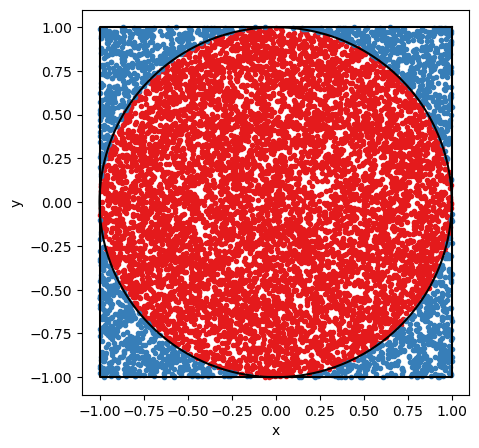


Pi is approximately 3.1692

This is 0.8788% off the true value.



In [30]:
MonteCarloPi(10000)

#### 1.2 Leibniz formula for $\pi$


[Wikipedia page](https://en.wikipedia.org/wiki/Leibniz_formula_for_π)

$$\pi/4 = \arctan(1) = \sum_{k=0}^{+\infty} \frac{(-1)^k}{2k + 1}$$

In [31]:
n = 10000000
k = np.arange(n)
pi_approx = 4*np.sum((-1)**k/(2*k + 1))
print(pi_approx)

3.1415925535897977


### (Optional) 2. Eigenvalues and eigenvectors of the second derivative

Consider the ODE with Dirichlet boundary conditions $u(0) = u(1) = 0$
$$\frac{d}{dx^2} u(x) = \lambda u(x), \quad x \in [0,1].$$
Solving this equation w.r.t $(\lambda, u)$ corresponds to finding the eigenvalues and eigenvectors of the second derivative. Explicitily, all the couples $(\lambda_j, u_j)$, $j \geq 0$, are (the eigenvalues are ordered in descending order)
$$\lambda_j = -j^2 \pi^2, \quad u_j(x) = \sqrt{2} \sin(j \pi x)$$.

To estimate the first $N$ couples, we can use the finite difference method
$$\frac{du}{dx^2} \approx \frac{u_{i+1} - 2 u_{i} + u_{i-1}}{h^2},$$
where now $u = [u_0, \dots, u_N]$ and $h = 1/N$.

In [38]:
def build_matrix(N):
    main_diag = -2*np.ones(N-1)
    off_diag = np.ones(N-2)
    derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, k=1)+ np.diag(off_diag, k=-1))
    return derivative_matrix

In [33]:
N = 1000
x = np.linspace(0,1,N+1)
h = x[1]-x[0]
trid_matrix = build_matrix(N)
trid_matrix

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [34]:
A = 1/(h**2)*trid_matrix
# Eigenvalues in ascending order
w, v = np.linalg.eigh(A) # returns eigenvalues, eigenvectors

In [35]:
w[-1]

-9.869596283561926

In [36]:
-np.pi**2

-9.869604401089358

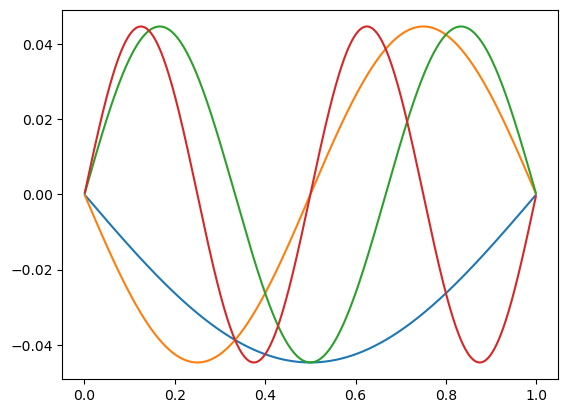

In [37]:
# Plot some the 5 eigenvectors related to the 5 smallest eigenvalues
for i in range(1,5):
    plt.plot(x[1:-1],v[:,-i])